# Диспетчер URL

   В приложении Django диспетчер URL используется для сопоставления URL-адреса с представлением, что помогает обрабатывать запрос и получить ответ.

   Чтобы разработать URL-адреса для приложения, вы создаете модуль Python, неофициально называемый URLconf (конфигурация URL-адреса). Этот модуль представляет собой чистый код Python и является сопоставлением между выражениями пути URL и функциями Python (вашими представлениями).

   Это сопоставление может быть сколь угодно коротким или длинным. Он может ссылаться на другие сопоставления. И поскольку это чистый код Python, его можно создавать динамически.

## Как Django обрабатывает запрос

   Когда пользователь запрашивает страницу с вашего сайта на Django, система следует этому алгоритму, чтобы определить, какой код Python выполнить:

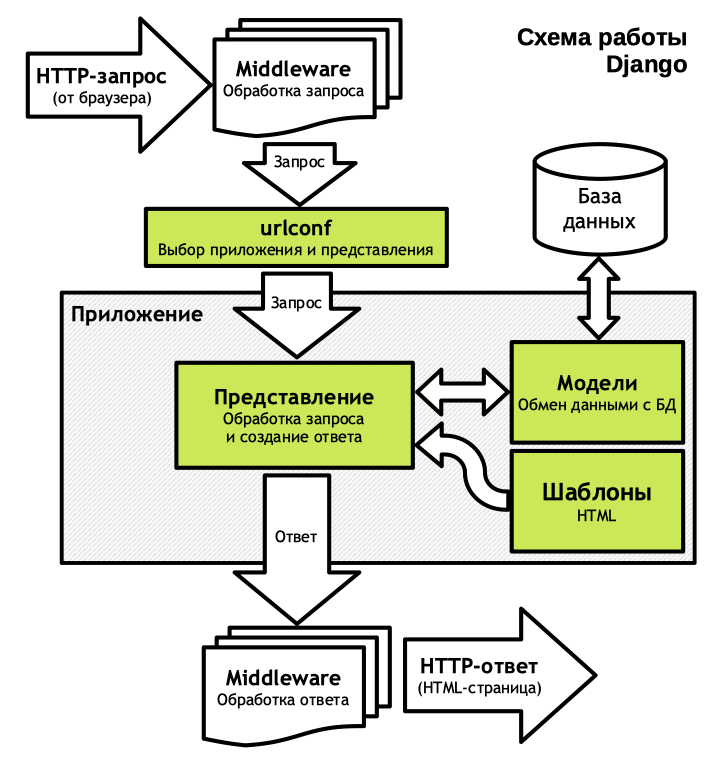

1. Django определяет используемый корневой модуль URLconf. Обычно это значение параметра __ROOT_URLCONF__, указанного в __settings.py__ проекта, но если входящий HttpRequest объект имеет атрибут __urlconf__ (установленный промежуточным программным обеспечением), его значение будет использоваться вместо ROOT_URLCONF параметра.

2. Django загружает этот модуль Python и ищет переменную __urlpatterns__, которая определена внутри файла __urls.py__ проекта. Это должна быть последовательность из __django.urls.path()__ и/или __django.urls.re_path()__ экземпляров.

3. Django проходит по каждому URL шаблону по порядку и останавливается на первом, который совпадает с запрошенным URL, сопоставляя его __path__.

4. Как только один из шаблонов URL совпадает, Django импортирует и вызывает заданное представление, которое является функцией Python (или представлением на основе классов). Представлению передаются следующие аргументы:<br></br> 
   * Экземпляр __HttpRequest__;
   * Если соответствующий шаблон URL не содержит именованных групп, то совпадения из регулярного выражения предоставляются как позиционные аргументы;
   * Аргументы ключевого слова состоят из любых именованных частей, совпадающих с предоставленным выражением пути, переопределенных любыми аргументами, указанными в необязательном аргументе __kwargs__ для __django.urls.path()__ или __django.urls.re_path()__;

5. Если шаблон URL-адреса не совпадает или если на каком-либо этапе этого процесса возникает исключение, Django вызывает соответствующее представление обработки ошибок.

Перейдем в __urls.py__ проекта (он находится на одном уровне с __settings.py__):

In [ ]:
from django.contrib import admin
from django.urls import path

urlpatterns = [
    path("admin/", admin.site.urls),
]

   Django заранее сам добавил в __urlpatterns__ URL-шаблон __path("admin/", admin.site.urls)__.Он используется для маршрутизации запросов, связанных с административной панелью (Django Admin). В этом URL-шаблоне:
   * __"admin/"__ - это путь, который будет добавлен к базовому URL вашего приложения. Таким образом административная панель будет доступна по адресу http://127.0.0.1:8000/admin/.
   * __admin.site.urls__ - это объект, который представляет конфигурацию административной панели Django. Он содержит все URL-шаблоны и настройки, необходимые для работы административной панели.

   Когда мы переходим по URL http://127.0.0.1:8000/admin/, Django использует этот URL-шаблон для определения, что запрос должен быть направлен на административную панель, и использует конфигурацию __admin.site.urls__ для обработки запроса и отображения административной панели Django.

   Внутри приложения __tasks__ добавим представление в __views.py__:

In [ ]:
from django.http import HttpResponse

def index(request):
    return HttpResponse("Страница приложения tasks.")

   Внутри __views.py__ прописываются представления (__views__) для обработки запроса при обращении к адресам приложения tasks

   Функция __index__ будет срабатывать при обращении к главной странице приложения __tasks__ и формировать ответ в виде простой строки.

   Здесь указывается первый обязательный параметр __request__ – это ссылка на экземпляр класса HttpRequest, который содержит информацию о запросе, о сессии, куках и так далее. То есть, через переменную __request__ доступна вся возможная информация в рамках текущего запроса. На выходе эта функция возвращает экземпляр объекта __HttpResponse__, который будет автоматически формировать нужный заголовок ответа, а содержимое будет представлено простой строкой.

   Вернемся в файл __urls.py__, чтобы связать эту функцию представления с соответствующим URL-адресом. В список адресов __urlpatterns__ добавим путь с помощью специальной функции __path__:

In [ ]:
from django.contrib import admin
from django.urls import path
from tasks.views import index

urlpatterns = [
    path("admin/", admin.site.urls),
    path('tasks/', index),
]

   Строка __from tasks.views import index__ выполняет импорт функции __index__ из модуля __views__ в приложения __tasks__.

   Рассмотрим подробнее строку __path('tasks/', index)__:
   * Первый аргумент – это суффикс URL-адреса, то есть, часть URL, которая добавляется после доменного имени (при этом в конце принято указывать слеш). Например, если сайт располагается по адресу http://127.0.0.1:8000 то первый аргумент 'tasks/' добавляется в конце этого пути: http://127.0.0.1:8000/tasks/
   * Второй аргумент – это ссылка на функцию представления, которая будет автоматически вызываться при срабатывании указанного URL-адреса и возвращать ответ на клиентский запрос. В примере ответ формируется в виде экземпляра класса HttpResponse.

Проверим работоспособность нового приложения и маршрута. Запустим тестовый веб-сервер:

In [ ]:
python manage.py runserver

И откроем страницу http://127.0.0.1:8000/tasks/

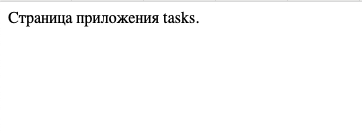

   Обратите внимание, как только мы добавили дополнительные маршруты, тестовая главная страница перестала выдаваться, вместо этого мы видим исключение __404 – страница не найдена__. Чтобы задать маршрут для главной страницы, нужно вместо «tasks/» записать пустую строку:

In [ ]:
from django.contrib import admin
from django.urls import path
from tasks.views import index

urlpatterns = [
    path("admin/", admin.site.urls),
    path('', index),
]

   Здесь пустая строка соответствует маршруту главной страницы, и при обращении к ней будет вызываться функция представления index.

   Такой подход, когда маршруты приложения прописываются в пакете конфигурации, не является удобным и делает проект менее структурированным и понятным.

   Django позволяет вторым параметром вместо функции представления передавать список URL-адресов приложения и связанные с ними функции. Для этого импортируем специальную функцию __include__:

In [ ]:
from django.urls import path, include

   В списке маршрутов подключим список URL из приложения tasks:

In [ ]:
from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path("admin/", admin.site.urls),
    path('', include('tasks.urls')), 
]

   В качестве параметра указывается строка, в которой сначала записывается имя приложения и через точку файл urls, где будут прописаны маршруты приложения.

Создадим, если его нет, файл __urls.py__ внутри директории приложения __tasks__. 

Внутри пустого __urls.py__ добавим следующие строки:

In [ ]:
from django.urls import path
from tasks import views

app_name = 'tasks'

urlpatterns = [
    path('', views.index),
]

   Здесь импортируется функция __path__, которая связывает URL c функциями представления, и импортируется модуль __views__ текущего пакета.

__app_name = 'tasks'__ устанавливает пространство имен приложения для URL-маршрутов, определенных в этом файле. Это особенно полезно в больших проектах, где может быть множество приложений, и таким образом можно избежать путаницы с именами URL-маршрутов.

В списке __urlpatterns__ вызывается функция __path__,  первым параметром указывается пустая строка, а вторым функция index. В основном пакете конфигурации указано, что к адресам 'tasks.urls' следует добавлять суффикс 'tasks/', то есть, функция index будет соответствовать адресу http://127.0.0.1:8000/tasks/

Поэтому пустая строка будет ссылаться именно на этот URL-адрес. Запустим веб-сервер и откроем эту страницу.

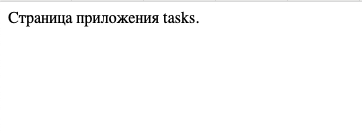

Отредактируем представление __index__ и добавим представление __another_page__:

In [ ]:
from django.http import HttpResponse
from django.urls import reverse

def index(request):
    another_page_url = reverse('tasks:another_page')
    html = f"<h1>Страница приложения tasks</h1><a href='{another_page_url}'>Перейти на другую страницу</a>"
    return HttpResponse(html)

def another_page(request):
    return HttpResponse("Это другая страница приложения tasks.")

В этом коде:

   * Используется функция __reverse__ для получения URL для маршрута __another_page__.
   * Создается строка HTML с тегом  \<a\>\, ведущим на URL, полученный с помощью __reverse__.
   * Эта HTML-строка возвращается в ответе через HttpResponse.

Когда пользователь перейдет на главную страницу приложения tasks, он увидит текст "Страница приложения tasks" и ссылку "Перейти на другую страницу". При клике на эту ссылку он будет перенаправлен на URL, связанный с представлением __another_page__.

Функция __reverse__ в Django является чрезвычайно полезным инструментом для динамического создания URL-адресов на основе имен маршрутов и их параметров. Она позволяет избежать жёсткого кодирования URL-адресов, делая приложение более гибким и легко поддерживаемым.

Разберёмся, как работает __reverse__:
1. __Прямой поиск URL по имени маршрута:__<br></br> 
__reverse__ позволяет получить URL-адрес, определяя его по имени маршрута.<br></br> 
2. __Использование с параметрами:__<br></br> 
Если маршрут URL принимает переменные (например, идентификаторы объектов), __reverse__ позволяет передать эти параметры и сгенерировать полный URL. Например, reverse('article-detail', kwargs={'pk': 42}) вернёт URL для детального просмотра статьи с первичным ключом 42.<br></br> 
3. __Изменение URL без изменения кода:__<br></br> 
Если мы решим изменить структуру URL-адресов в приложении, нам не придётся переписывать все URL в шаблонах или представлениях. Просто изменяем определение маршрута, и __reverse__ автоматически отразит эти изменения.<br></br> 
4. __Читаемость и поддерживаемость:__<br></br> 
Использование именованных URL-маршрутов с __reverse__ делает твой код более понятным, поскольку мы работаем с явными именами, а не с конкретными путями. Это упрощает разработку и поддержку кода.<br></br> 

Подключим новый URL-маршрут в tasks/urls.py:

In [ ]:
from django.urls import path
from tasks import views

app_name = 'tasks'

urlpatterns = [
    path('', views.index),
    path('another/', views.another_page, name='another_page'),  # новый маршрут
]

Запустим веб-сервер и откроем страницу http://127.0.0.1:8000/tasks/:

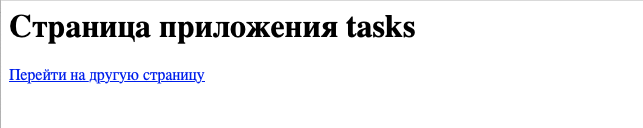

Строка "Страница приложения tasks" стала заголовком благодарю тегу \<h1\> и появилась строка-ссылка на новую страницу. При нажатии на мы попадаем на новую страницу по адресу http://127.0.0.1:8000/tasks/another/

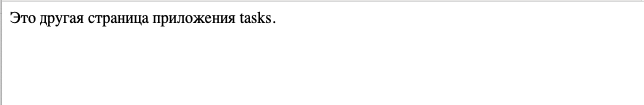

## Конвертеры пути

По умолчанию доступны следующие конвертеры пути:<br></br> 
   * __str__ - Соответствует любой непустой строке, за исключением разделителя пути '/'. Это значение по умолчанию, если преобразователь не включен в выражение.<br></br> 
   * __int__ - Соответствует нулю или любому положительному целому числу. Возвращает int.<br></br> 
   * __slug__ - Соответствует любой служебной строке, состоящей из букв или цифр ASCII, а также знаков дефиса и подчеркивания. Например, building-your-1st-django-site.<br></br> 
   * __uuid__ - Соответствует форматированному UUID. Чтобы предотвратить сопоставление нескольких URL-адресов с одной и той же страницей, необходимо использовать тире и буквы должны быть строчными. Например, 075194d3-6885-417e-a8a8-6c931e272f00. Возвращает UUIDэкземпляр.<br></br> 
   * __path__ - Соответствует любой непустой строке, включая разделитель пути '/'. Это позволяет вам сопоставлять полный путь URL, а не сегмент пути URL, как с str.<br></br> 

### Пример

In [ ]:
from django.urls import path

from . import views

urlpatterns = [
    path('articles/2003/', views.special_case_2003),
    path('articles/<int:year>/', views.year_archive),
    path('articles/<int:year>/<int:month>/', views.month_archive),
    path('articles/<int:year>/<int:month>/<slug:slug>/', views.article_detail),
]

   * Запрос на __/articles/2005/03/__ совпадает с третьей записью в списке. Django вызовет функцию __views.month_archive(request, year=2005, month=3)__

   * __/articles/2003/__ будет соответствовать первому шаблону в списке, а не второму, потому что шаблоны проверяются по порядку. Здесь Django вызовет функцию __views.special_case_2003(request)__

   * __/articles/2003__ не будет соответствовать ни одному из этих шаблонов, потому что каждый шаблон требует, чтобы URL-адрес заканчивался косой чертой.

   * __/articles/2003/03/building-a-django-site/__ будет соответствовать крайнему шаблону. Django вызовет функцию __views.article_detail(request, year=2003, month=3, slug="building-a-django-site")__

## Использование регулярных выражений

Если синтаксиса путей и преобразователей недостаточно для определения шаблонов URL-адресов, можно использовать регулярные выражения. Для этого используется __re_path()__ вместо __path()__.

В регулярных выражениях Python для именованных групп регулярных выражений используется синтаксис __(?P\<name>pattern)__, где __name__ - имя группы и pattern некоторого шаблона для сопоставления.

Предыдущий пример URLconf, переписанный с использованием регулярных выражений:

In [ ]:
from django.urls import path, re_path

from . import views

urlpatterns = [
    path('articles/2003/', views.special_case_2003),
    re_path(r'^articles/(?P<year>[0-9]{4})/$', views.year_archive),
    re_path(r'^articles/(?P<year>[0-9]{4})/(?P<month>[0-9]{2})/$', views.month_archive),
    re_path(r'^articles/(?P<year>[0-9]{4})/(?P<month>[0-9]{2})/(?P<slug>[\w-]+)/$', views.article_detail),
]

   * Точные URL-адреса более ограничены. Например, год 10000 больше не будет соответствовать маршруту, поскольку целые числа года должны быть записаны четырьмя цифрами.
   * Каждый захваченный аргумент отправляется в представление в виде строки, независимо от того, какое соответствие дает регулярное выражение.
   * При переключении с использования __path()__ на __re_path()__ или наоборот, тип аргументов представления может измениться, и поэтому может потребоваться адаптировать представления.

## Обработка ошибок

Когда Django не может найти совпадение для запрошенного URL или когда возникает исключение, Django вызывает представление обработки ошибок.

Представления, используемые для этих случаев, задаются четырьмя переменными. Их значений по умолчанию должно хватить для большинства проектов, но возможна дальнейшая настройка, переопределив их значения по умолчанию.

Такие значения могут быть установлены в вашем корневом URLconf. Установка этих переменных в любом другом URLconf не даст никакого эффекта.

Значения должны быть вызываемыми или строками, представляющими полный путь импорта Python к представлению, которое должно быть вызвано для обработки текущего состояния ошибки.

Переменные:

   * __handler400__

Представление __bad_request()__ отменяется __handler400__

In [ ]:
handler400 = 'mysite.views.my_custom_bad_request_view'

Вызываемый объект или строка, представляющая полный путь импорта Python к представлению, которое должно вызываться, если HTTP-клиент отправил запрос, вызвавший состояние ошибки, и ответ с кодом состояния __400__.

По умолчанию это __django.views.defaults.bad_request()__. Если вы реализуете пользовательское представление, убедитесь, что он принимает __request__ и __exception__ аргументы и возвращает __HttpResponseBadRequest__.

   * __handler403__

Представление permission_denied() отменяется handler403

In [ ]:
handler403 = 'mysite.views.my_custom_permission_denied_view'

Вызываемый объект или строка, представляющая полный путь импорта Python к представлению, которое должно быть вызвано, если у пользователя нет разрешений, необходимых для доступа к ресурсу.

По умолчанию это __django.views.defaults.permission_denied()__. Если вы реализуете пользовательское представление, убедитесь , что он принимает __request__ и __exception__ аргументы и возвращает __HttpResponseForbidden__.

   * __handler404__

Представление page_not_found() отменяется handler404

In [ ]:
handler404 = 'mysite.views.my_custom_page_not_found_view'

Вызываемый объект или строка, представляющая полный путь импорта Python к представлению, которое должно быть вызвано, если ни один из шаблонов URL-адресов не совпадает.

По умолчанию это __django.views.defaults.page_not_found()__. Если вы реализуете пользовательское представление, убедитесь , что он принимает __request__ и __exception__ аргументы и возвращает __HttpResponseNotFound__.

   * __handler500__

Представление server_error() отменяется handler500

In [ ]:
handler500 = 'mysite.views.my_custom_error_view'

Вызываемый объект или строка, представляющая полный путь импорта Python к представлению, которое следует вызывать в случае ошибок сервера. Ошибки сервера возникают, когда у вас есть ошибки времени выполнения в коде просмотра.

По умолчанию это __django.views.defaults.server_error()__. Если вы реализуете настраиваемое представление, убедитесь, что оно принимает __request__ аргумент и возвращает __HttpResponseServerError__.

## Включение других URLconfs

В любой момент в __urlpatterns__ можно «включить» другие модули URLconf с помощью __include__. По сути, это «укореняет» набор URL адресов ниже других.

Другая возможность - включить дополнительные шаблоны URL-адресов с помощью списка __path()__ экземпляров. Например, рассмотрим этот URLconf:

In [ ]:
from django.urls import include, path

from apps.main import views as main_views
from credit import views as credit_views

extra_patterns = [
    path('reports/', credit_views.report),
    path('reports/<int:id>/', credit_views.report),
    path('charge/', credit_views.charge),
]

urlpatterns = [
    path('', main_views.homepage),
    path('help/', include('apps.help.urls')),
    path('credit/', include(extra_patterns)),
]

В этом примере __/credit/reports/__ URL будет обрабатываться представлением __credit_views.report()__ Django.

Это можно использовать для удаления избыточности из URLconfs, где один префикс шаблона используется многократно. Например, рассмотрим этот URLconf:

In [ ]:
from django.urls import path
from . import views

urlpatterns = [
    path('<page_slug>-<page_id>/history/', views.history),
    path('<page_slug>-<page_id>/edit/', views.edit),
    path('<page_slug>-<page_id>/discuss/', views.discuss),
    path('<page_slug>-<page_id>/permissions/', views.permissions),
]

Мы можем улучшить это, указав общий префикс пути только один раз и сгруппировав суффиксы, которые отличаются:

In [ ]:
from django.urls import include, path
from . import views

urlpatterns = [
    path('<page_slug>-<page_id>/', include([
        path('history/', views.history),
        path('edit/', views.edit),
        path('discuss/', views.discuss),
        path('permissions/', views.permissions),
    ])),
]

# Домашнее задание

1. __Основные маршруты URL__
   * В файле urls.py главного проекта настройте основной маршрутизатор URL, подключив твое приложение.
   * Создайте в приложении __quality_сontrol__ файл urls.py и определите в нем маршруты:
       * Главная страница (/): Отображает обзор системы контроля качества, должна обрабатываться представлением "index", при попадании на эту страницу должна выводиться строка-заголовок "Система контроля качества" и две ссылки на "Список всех багов" и на "Запросы на улучшение"
       * Маршрут для списка отчетов об ошибках (багах) (bugs/): Должна обрабатываться представлением "bug_list" и выводить строку-заголовок "Cписок отчетов об ошибках"
       * Маршрут для списка запросов на улучшение (features/): Должна обрабатываться представлением "feature_list" и выводить строку-заголовок "Список запросов на улучшение"
   * Создайте соответствующие представления (views) для обработки этих маршрутов в файле views.py вашего приложения.<br></br>
2. __Параметризованные маршруты URL__   
   * В urls.py добавьте маршруты, которые принимают параметры:
       * Маршрут для получения деталей конкретного бага (): С помощью конверторов пути вам нужно получать ID бага (bug_id) и обрабатывать маршрут с помощью представления "bug_detail". Должна выводиться строка "Детали бага <здесь должен быть bug_id>" (Например: "Детали бага 1488")
       * Маршрут для получения деталей конкретного улучшения (): С помощью конверторов пути вам нужно получать ID улучшения (feature_id) и обрабатывать маршрут с помощью представления "feature_id_detail". Должна выводиться строка "Детали улучшения <здесь должен быть feature_id>" (Например: "Детали улучшения 882")
   * Обработайте эти маршрут в соответствующих представлениях, извлекая bug_id и feature_id из URL и передавая его в шаблон.<br></br>
3. __Использование пространства имен__
   * Добавьте на главную страницу tasks ссылку на главную страницу вашего приложения quality_control используя пространства имен URL

Ссылка на документацию Django: https://docs.djangoproject.com/en/5.0/